# Aeorosl Optical Properties from the SAIL Campaign 
In order to assess aerosol’s effects on surface snow albedo we first found a smoke, dust, and neutral event to compare. These events are Jan 25 – 30th 2022, Apr 3 – 8th 2023, and Jan 2 – 7th 2023 respectively.

![image info](./2022_002_AOD_Map.png)

![image info](./2022_025_AOD_Map.png)

![image info](./2023_123_AOD_Map.png)

In [1]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from datetime import timedelta

import cmweather
import numpy as np
import pandas as pd
import xarray as xr
import glob

from bokeh.models.formatters import DatetimeTickFormatter
import hvplot.xarray
import holoviews as hv
hv.extension("bokeh")

import act
import pyart

warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



# Jan 25th - 30th 2022

In [9]:
# Set your username and token here!
username = 'user name'
token = 'token'

# Set the datastream and start/enddates for Smoke event
datastream = 'gucaoppsap1flynn1hS2.c1'
startdate = '2022-01-25'
enddate = '2022-01-30'

# Use ACT to download data
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds = act.io.read_arm_netcdf(result)

# Set the datastream and start/enddates for Dust event
datastream = 'gucaoppsap1flynn1hS2.c1'
startdate = '2023-04-03'
enddate = '2023-04-08'

result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds2 = act.io.read_arm_netcdf(result)

# Set the datastream and start/enddates for Control event
datastream = 'gucaoppsap1flynn1hS2.c1'
startdate = '2022-01-02'
enddate = '2022-01-07'

result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds3 = act.io.read_arm_netcdf(result)

# clean the data for each case
ds.clean.cleanup()
ds2.clean.cleanup()
ds3.clean.cleanup()

InvalidURL: URL can't contain control characters. '/armlive/livedata/query?user=user name:token&ds=gucaoppsap1flynn1hS2.c1&start=2022-01-25T00:00:00.000Z&end=2022-01-30T00:00:00.000Z&wt=json' (found at least ' ')

## Smoke Case Beta Absorption and Scattering

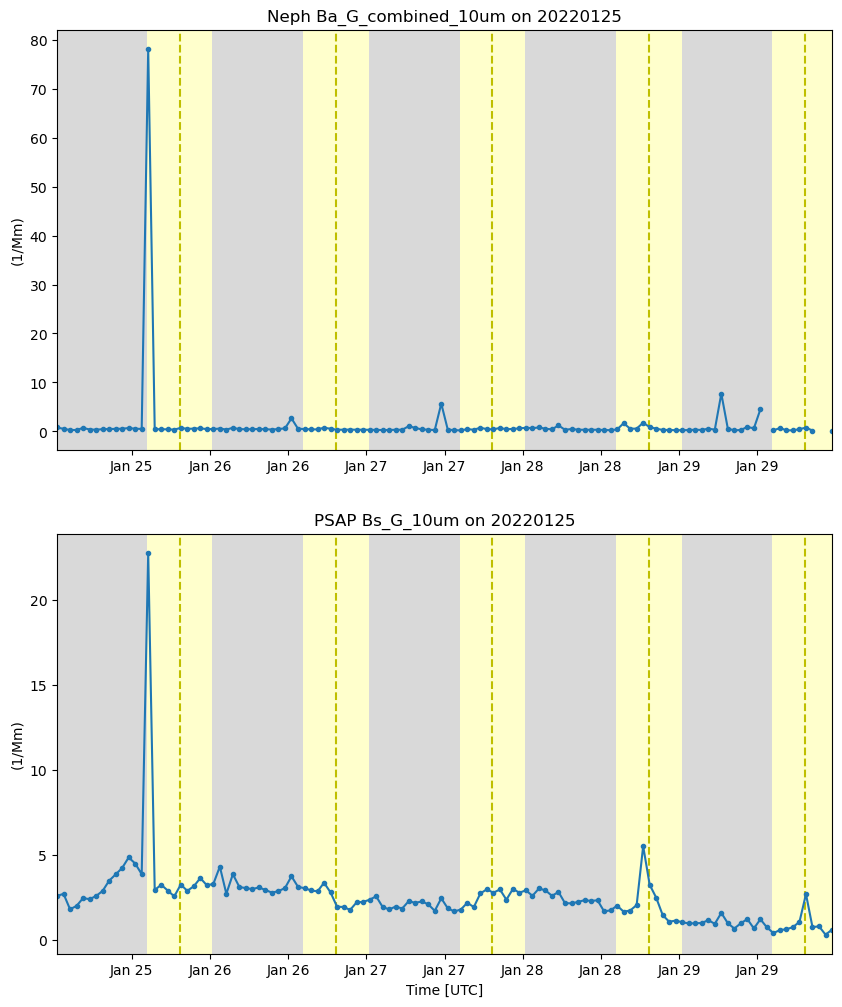

In [3]:
# create a display with subplots for Abs and Sca
display = act.plotting.TimeSeriesDisplay({'PSAP': ds, 'Neph': ds},
                                         subplot_shape=(2,), figsize=(10,12))

# Plot Abs for the first plot
display.plot('Ba_G_combined_10um', dsname='Neph', subplot_index=(0,))
display.day_night_background(dsname='Neph', subplot_index=(0,))

# Plot Sca as the second plot
display.plot('Bs_G_10um',dsname='PSAP', subplot_index=(1,))
display.day_night_background(dsname='PSAP',subplot_index=(1,))

plt.show()

## Smoke Case AAE, AE, and SSA
### AAE:
AAE during the smoke event almost entirely falls between the debated range of black carbon (~1.30 - 0.80).
### AE:
AE during the smoke event stays in the threshold of fine mode particles (~1.7) and sees a decrease in particles sizes ~2 days into the event.
### SSA:
SSA during the smoke event held in the upper 0.80s which while not far from 1.0 is still indicative of darker absorbing particles. SSA dropped further in the final two days of the event.

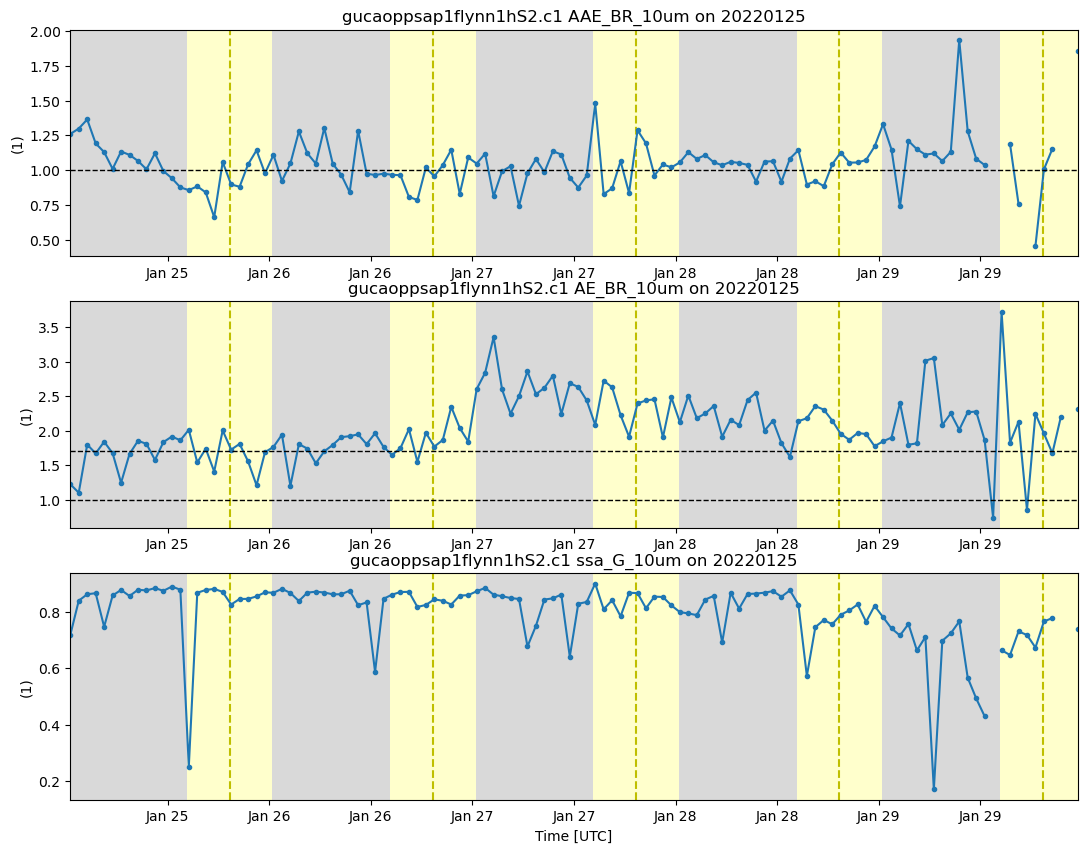

In [4]:
# create a line to indicate important points
line = np.ones(24*5)
# create a display with subplots for AAE, AE, and SSA
display = act.plotting.TimeSeriesDisplay(ds, figsize=(13, 10), subplot_shape=(3,))

# plot AAE
display.plot('AAE_BR_10um', subplot_index=(0,))
# indicate black carbon
display.axes[0].plot(ds['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(0,))

# plot AE
display.plot('AE_BR_10um', subplot_index=(1,))
# indicate fine mode
display.axes[1].plot(ds['time'], line *1.7, 'k', linewidth=1, linestyle='--')
# indicate coarse mode
display.axes[1].plot(ds['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(1,))

# plot ssa
display.plot('ssa_G_10um', subplot_index=(2,))
display.day_night_background(subplot_index=(2,))


# April 3rd - 8th 2023

## Dust Case Beta Absorption and Scattering

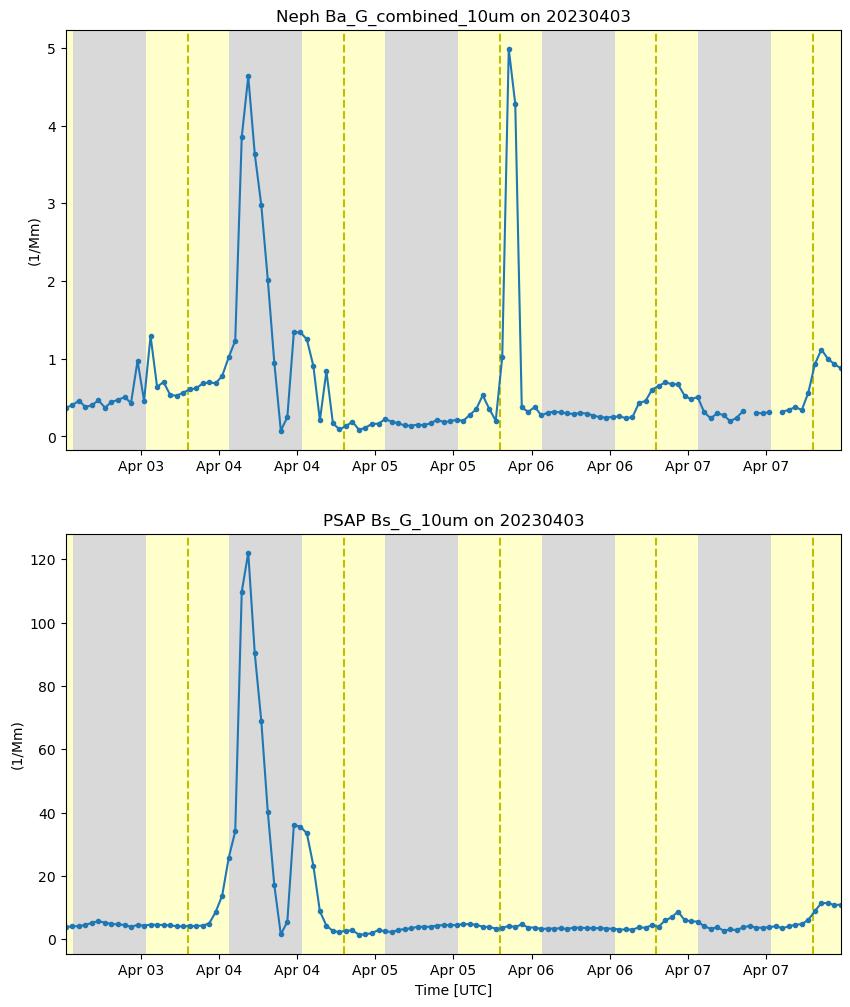

In [5]:
# create a display with subplots for Abs and Sca
display = act.plotting.TimeSeriesDisplay({'PSAP': ds2, 'Neph': ds2},
                                         subplot_shape=(2,), figsize=(10,12))

# Plot Abs for the first plot
display.plot('Ba_G_combined_10um', dsname='Neph', subplot_index=(0,))
display.day_night_background(dsname='Neph', subplot_index=(0,))

# Plot Sca as the second plot
display.plot('Bs_G_10um',dsname='PSAP', subplot_index=(1,))
display.day_night_background(dsname='PSAP',subplot_index=(1,))

plt.show()


## Dust Case AAE, AE, and SSA
### AAE:
AAE during the dust event is mostly held above or around the upper limit of black carbon (~1.30 - 0.80). This likely indicates the presence of brown carbons or other dust-like particles as expected.
### AE:
AE during the dust event fluctuated between values < 1.a (course mode) for the first two days, > 1.7 (fine mode) for the next two days, and back to course mode for the final two days. 
### SSA:
SSA during the dust event held in the lower to mid 0.90s which indicates relatively bright particles


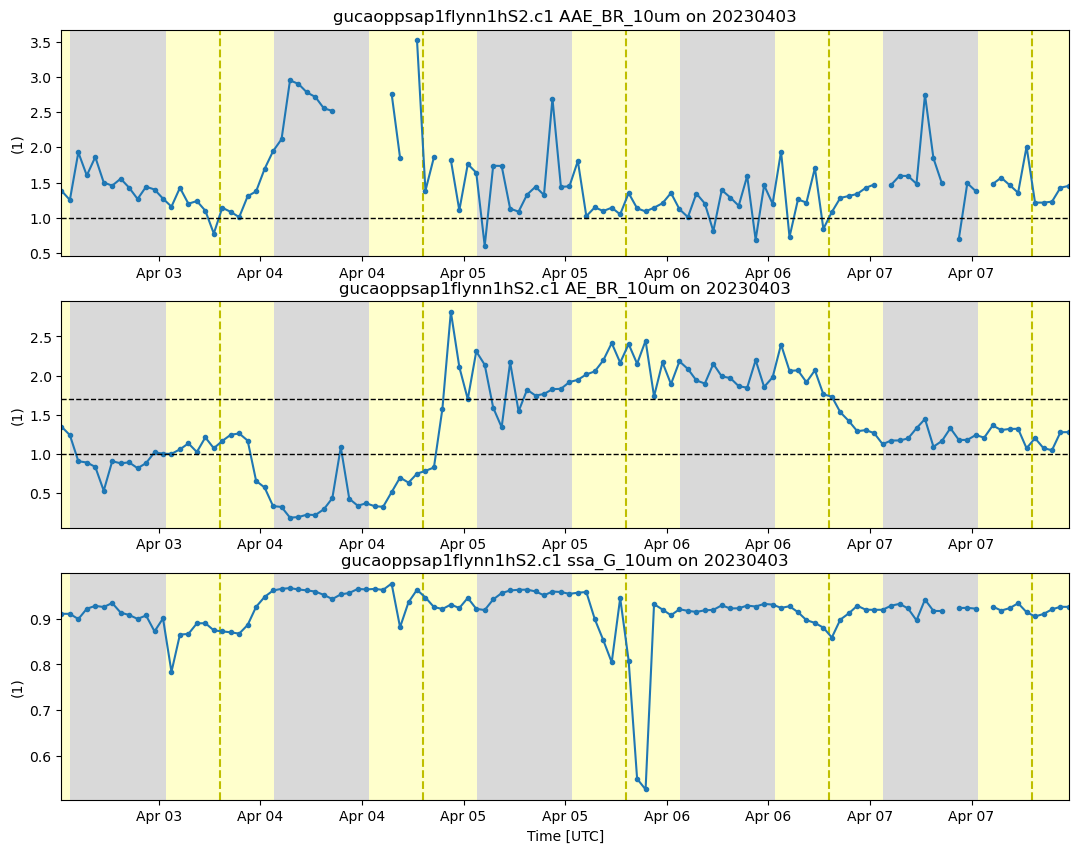

In [6]:
# create a line to indicate important points
line = np.ones(24*5)
# create a display with subplots for AAE, AE, and SSA
display = act.plotting.TimeSeriesDisplay(ds2, figsize=(13, 10), subplot_shape=(3,))

# plot AAE
display.plot('AAE_BR_10um', subplot_index=(0,))
# indicate black carbon
display.axes[0].plot(ds2['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(0,))

# plot AE
display.plot('AE_BR_10um', subplot_index=(1,))
# indicate coarse mode
display.axes[1].plot(ds2['time'], line *1.7, 'k', linewidth=1, linestyle='--')
# indicate fine mode
display.axes[1].plot(ds2['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(1,))

# plot SSA
display.plot('ssa_G_10um', subplot_index=(2,))
display.day_night_background(subplot_index=(2,))

# Jan 2nd - 7th 2022

## Control Case Beta Absorption and Scattering

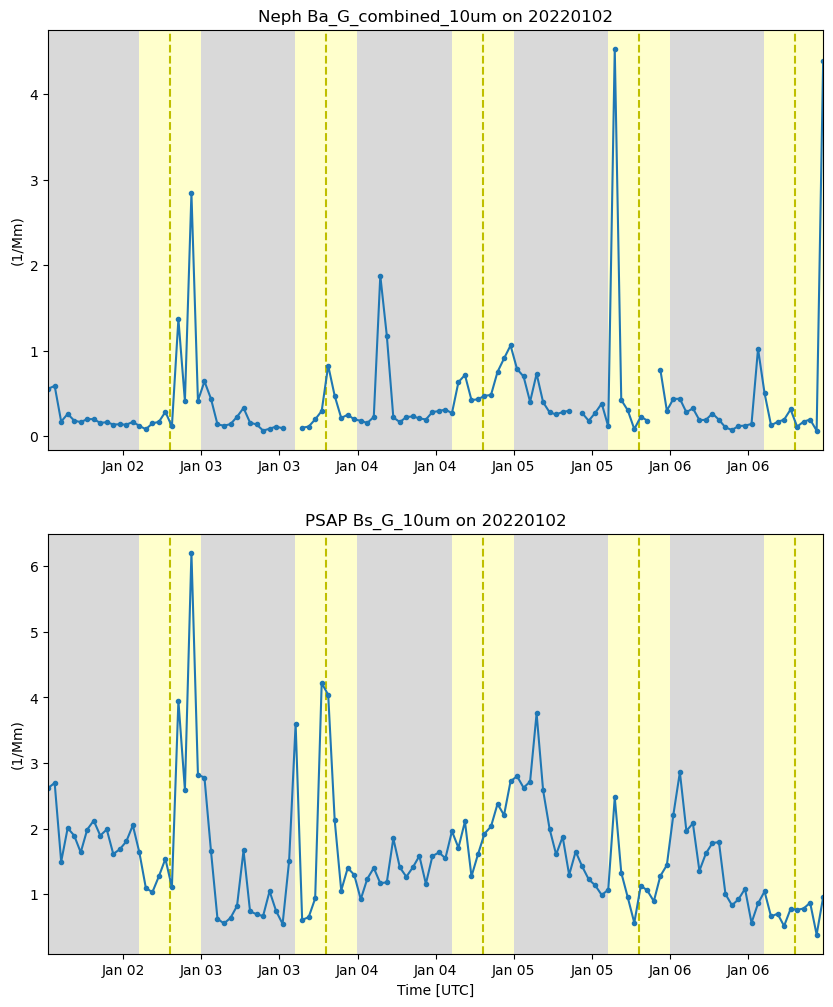

In [7]:
# create a display with subplots for Abs and Sca
display = act.plotting.TimeSeriesDisplay({'PSAP': ds3, 'Neph': ds3},
                                         subplot_shape=(2,), figsize=(10,12))

# Plot Abs for the first plot
display.plot('Ba_G_combined_10um', dsname='Neph', subplot_index=(0,))
display.day_night_background(dsname='Neph', subplot_index=(0,))

# Plot Sca as the second plot
display.plot('Bs_G_10um',dsname='PSAP', subplot_index=(1,))
display.day_night_background(dsname='PSAP',subplot_index=(1,))

plt.show()


##Controlt Case AAE, AE, and SSA
### AAE:
AAE during the control event is mostly held above or around the upper limit of black carbon (~1.30 - 0.80). However, the range of values seems to indicate a variety of particle types present.
### AE:
AE during the control event varied between fine and coarse modes with a preference for fine mode. However, the final two days of the event trended toward values in the course mode range. 
### SSA:
SSA during the control event varied between values in the mid-0.90s and the 0.80s or lower. As the event went on there was an increasing trend toward darker particles. 


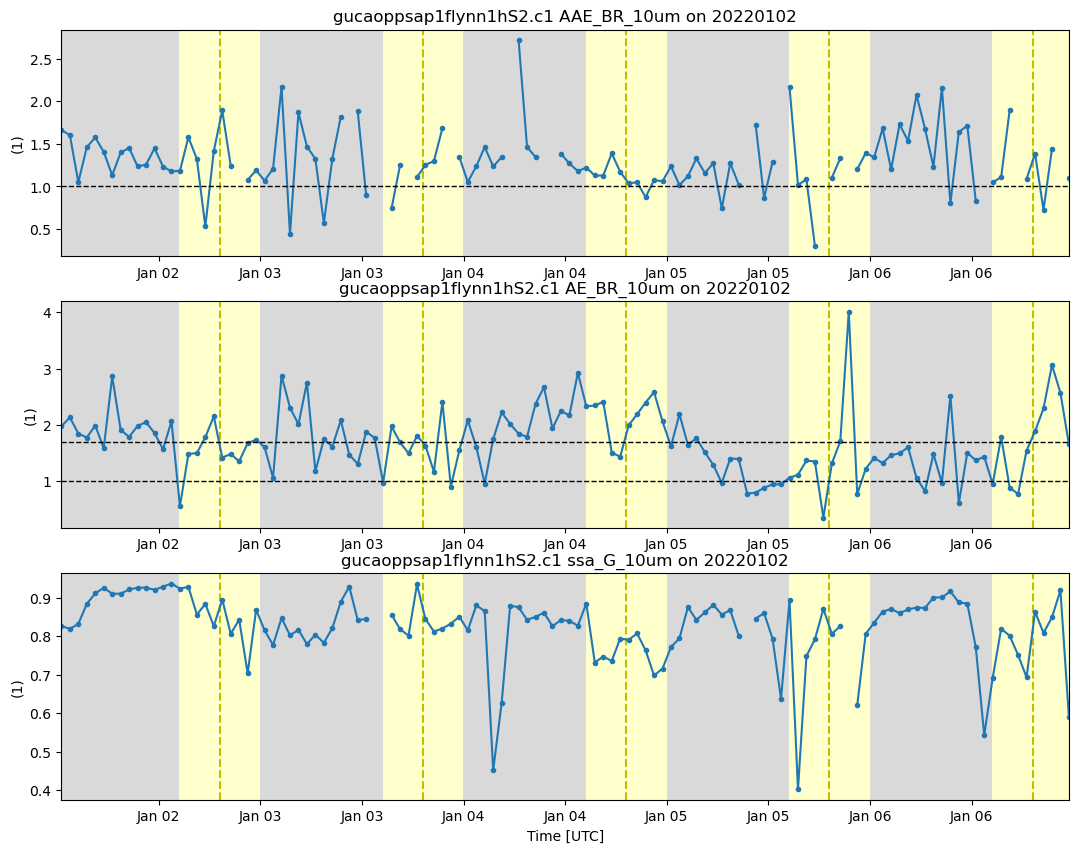

In [8]:
# create a line to indicate important points
line = np.ones(24*5)
# create a display with subplots for AAE, AE, and SSA
display = act.plotting.TimeSeriesDisplay(ds3, figsize=(13, 10), subplot_shape=(3,))

# plot AAE
display.plot('AAE_BR_10um', subplot_index=(0,))
# indicate black carbon
display.axes[0].plot(ds3['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(0,))

# plot AE
display.plot('AE_BR_10um', subplot_index=(1,))
# indicate coarse mode
display.axes[1].plot(ds3['time'], line *1.7, 'k', linewidth=1, linestyle='--')
# indicate fine mode
display.axes[1].plot(ds3['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(1,))

# plot SSA
display.plot('ssa_G_10um', subplot_index=(2,))
display.day_night_background(subplot_index=(2,))